# Keras
Librería para programar redes neuronales de una manera más sencilla que con TensorFlow. Keras se encuentra en una capa de abstracción por encima de TensorFlow.

[Documentación](https://keras.io/guides/)

In [ ]:
# !pip install tensorflow
# !pip install keras

Empezamos importando librerías

In [ ]:
# import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

Cargamos los datos de mnist. No vamos a tratar imagenes con redes convolucionales (perdemos la estructura espacial 2D). Todos los pixeles se convertirán en un vector de 28x28 features independientes, que serán las entradas del modelo.

In [2]:
# Cogemos las imágenes de los dígitos asi como el conjunto de train y test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

Vemos dimensiones del dataset

In [3]:
'''
60.000 imagenes de 28x28 pixeles
'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
2**8

256

60.000 imágenes de 28x28 pixeles. Vamos a representar una de ellas

C:\Users\Miguel Angel\AppData\Local\Temp\ipykernel_6324\3096108358.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));


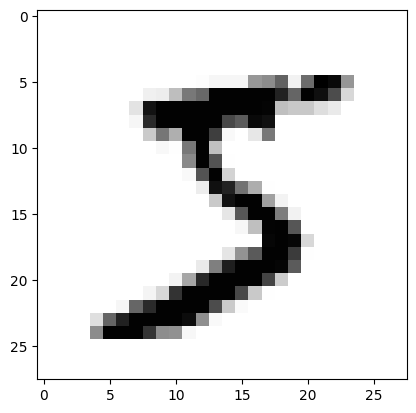

In [5]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));

Cada imagen se compone de 28x28 pixeles, y cada pixel representa una escala de grises que va del 0 al 255. Siendo 0 el blanco y 255 negro.

¿Se te ocurre alguna manera de normalizar los datos?

In [6]:
np.max(X_train)

255

In [7]:
0/255

0.0

In [8]:
128/255

0.5019607843137255

In [9]:
255/255

1.0

In [10]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [14]:
np.mean(X_train)

0.13066062

In [15]:
'''
Comprobamos la normalización
'''
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

Guardamos datos para validación. Estos datos se usarán durante el entrenamiento. Otra opción es decirle a keras en la etapa de entrenamiento que reserve un X % de los datos para validar.

In [14]:
X_val = X_train[-10000:]
y_val = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]

In [15]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(40000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: API para iniciar la red neuronal. No cuenta como capa.
* **Flatten**: capa de entrada. Necesita un vector unidimensional. Como tenemos imágenes, esta capa aplana las imagenes (2D) en 1D.
* **Dense**: es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación multiclase (10 clases) y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la ultima (output) suele ser una softmax.

In [16]:
28*28

784

In [17]:
X_train.shape

(40000, 28, 28)

In [17]:
28*28

784

In [18]:
model = keras.models.Sequential()

# Capa entrada
model.add(keras.layers.Flatten(input_shape=(28, 28)))

# Hidden layer
model.add(keras.layers.Dense(units = 300,
                            activation='relu'))

# Hidden layer
model.add(keras.layers.Dense(units = 100,
                            activation='relu'))

# Capa salida
model.add(keras.layers.Dense(units = 10,
                            activation='softmax'))

In [45]:
# Otra manera de declarar la red neuronal
capas = [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units = 300, activation='relu'),
    keras.layers.Dense(units = 100, activation='relu'),
    keras.layers.Dense(units = 10, activation='softmax')
]

model = keras.models.Sequential(capas)

Podemos ver las capas, y acceder a sus elementos

In [20]:
print(model.layers[0])

Podemos ver los pesos de las capas sin entrenar, porque los inicializa aleatoriamente. Los bias los inicializa a 0.

In [23]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [24]:
weights

array([[ 0.07000935, -0.01570813,  0.05609965, ...,  0.05186507,
         0.0039544 , -0.03760503],
       [-0.0374433 ,  0.02414865, -0.04913577, ..., -0.00071819,
        -0.07389734, -0.07403124],
       [ 0.01045132, -0.02342552, -0.01363755, ..., -0.03862363,
         0.07259874,  0.06267877],
       ...,
       [ 0.05183624,  0.03152754, -0.06924748, ..., -0.00107355,
         0.05507182, -0.02244285],
       [-0.04077723, -0.0498422 , -0.03065461, ..., -0.05667526,
        -0.05628294, -0.03612458],
       [ 0.05347902, -0.07288817,  0.03784343, ..., -0.03681912,
         0.01385988, -0.05467883]], dtype=float32)

In [25]:
len(weights)

784

In [27]:
len(weights[0])

300

In [33]:
28*28

784

In [28]:
300*784

235200

In [27]:
weights.size

235200

In [28]:
len(biases)

300

Establecemos la configuración de ejecución... el compile.

In [42]:
model.compile(
    optimizer = keras.optimizers.SGD(),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = [keras.metrics.SparseCategoricalAccuracy()]
)

In [47]:
# Equivalente
model.compile(
    optimizer = "sgd",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [32]:
# Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
784 * 300 + 300

235500

In [33]:
# 1º neurona de la 1º hidden layer
# y = a + w1*x1 + w2*x2 + .... wn*xn
# a es el intercepto llamado bias
# wn es cada uno de los pesos que va a ir actualizando con el backpropagation
# n es 784
# En la 1º hidden layer tenemos 784 pesos por cada neurona, al tener 300, tenemos un total de:
print(784*300 + 300)

235500


In [43]:
300 * 784 + 300

235500

In [44]:
300 * 100 + 100

30100

In [45]:
100 * 10 + 10

1010

Entrenamos el modelo. Usamos los datos de entrenamiento. El batch_size es la cantidad de muestras que utiliza el SGD, y las epochs son las iteraciones que realiza en el entrenamiento.

In [34]:
X_train.shape

(40000, 28, 28)

In [ ]:
40000/128

78.125

In [48]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs = 50,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/50
313/313 [==============================] - 3s 8ms/step - loss: 1.3995 - accuracy: 0.6704 - val_loss: 0.7731 - val_accuracy: 0.8365
Epoch 2/50
313/313 [==============================] - 3s 8ms/step - loss: 0.5857 - accuracy: 0.8635 - val_loss: 0.4956 - val_accuracy: 0.8693
Epoch 3/50
313/313 [==============================] - 3s 8ms/step - loss: 0.4349 - accuracy: 0.8871 - val_loss: 0.4164 - val_accuracy: 0.8848
Epoch 4/50
313/313 [==============================] - 2s 8ms/step - loss: 0.3774 - accuracy: 0.8985 - val_loss: 0.3762 - val_accuracy: 0.8936
Epoch 5/50
313/313 [==============================] - 2s 8ms/step - loss: 0.3440 - accuracy: 0.9054 - val_loss: 0.3506 - val_accuracy: 0.9004
Epoch 6/50
313/313 [==============================] - 3s 8ms/step - loss: 0.3210 - accuracy: 0.9108 - val_loss: 0.3327 - val_accuracy: 0.9041
Epoch 7/50
313/313 [==============================] - 3s 9ms/step - loss: 0.3029 - accuracy: 0.9157 - val_loss: 0.3173 - val_accuracy: 0.9084
Epoch 

Podemos reentrenar el modelo. No empieza de nuevo, sino que retoma el entrenamiento anterior.

In [44]:
model.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs = 10,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/10
625/625 [==============================] - 5s 7ms/step - loss: 0.9370 - accuracy: 0.7746 - val_loss: 0.4908 - val_accuracy: 0.8657
Epoch 2/10
625/625 [==============================] - 4s 7ms/step - loss: 0.4079 - accuracy: 0.8905 - val_loss: 0.3760 - val_accuracy: 0.8914
Epoch 3/10
625/625 [==============================] - 4s 6ms/step - loss: 0.3345 - accuracy: 0.9071 - val_loss: 0.3328 - val_accuracy: 0.9026
Epoch 4/10
625/625 [==============================] - 4s 7ms/step - loss: 0.2967 - accuracy: 0.9167 - val_loss: 0.3034 - val_accuracy: 0.9124
Epoch 5/10
625/625 [==============================] - 4s 7ms/step - loss: 0.2703 - accuracy: 0.9238 - val_loss: 0.2827 - val_accuracy: 0.9176
Epoch 6/10
625/625 [==============================] - 4s 6ms/step - loss: 0.2488 - accuracy: 0.9298 - val_loss: 0.2641 - val_accuracy: 0.9226
Epoch 7/10
625/625 [==============================] - 4s 6ms/step - loss: 0.2314 - accuracy: 0.9345 - val_loss: 0.2501 - val_accuracy: 0.9290
Epoch 

Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

In [49]:
# print(history.params)
# print(history.epoch)
print(history.history)

{'loss': [1.3994892835617065, 0.585737943649292, 0.4348529875278473, 0.37741267681121826, 0.34403035044670105, 0.3209538459777832, 0.302896648645401, 0.2882995307445526, 0.27568113803863525, 0.2643889784812927, 0.2544366717338562, 0.24537797272205353, 0.23700793087482452, 0.22884821891784668, 0.22181475162506104, 0.21527627110481262, 0.20853191614151, 0.20250873267650604, 0.19681386649608612, 0.1915588229894638, 0.18637056648731232, 0.18140378594398499, 0.17663323879241943, 0.172371968626976, 0.16808755695819855, 0.1640390008687973, 0.16004252433776855, 0.15621067583560944, 0.15268008410930634, 0.1490810364484787, 0.14592358469963074, 0.14260746538639069, 0.1395752727985382, 0.1364753246307373, 0.13363954424858093, 0.13098451495170593, 0.1279985010623932, 0.12567581236362457, 0.12303094565868378, 0.12042186409235, 0.11827375739812851, 0.11585959792137146, 0.11353785544633865, 0.11134776473045349, 0.10925804078578949, 0.10712197422981262, 0.10535434633493423, 0.10336808860301971, 0.1013

In [50]:
history.history

{'loss': [1.3994892835617065,
  0.585737943649292,
  0.4348529875278473,
  0.37741267681121826,
  0.34403035044670105,
  0.3209538459777832,
  0.302896648645401,
  0.2882995307445526,
  0.27568113803863525,
  0.2643889784812927,
  0.2544366717338562,
  0.24537797272205353,
  0.23700793087482452,
  0.22884821891784668,
  0.22181475162506104,
  0.21527627110481262,
  0.20853191614151,
  0.20250873267650604,
  0.19681386649608612,
  0.1915588229894638,
  0.18637056648731232,
  0.18140378594398499,
  0.17663323879241943,
  0.172371968626976,
  0.16808755695819855,
  0.1640390008687973,
  0.16004252433776855,
  0.15621067583560944,
  0.15268008410930634,
  0.1490810364484787,
  0.14592358469963074,
  0.14260746538639069,
  0.1395752727985382,
  0.1364753246307373,
  0.13363954424858093,
  0.13098451495170593,
  0.1279985010623932,
  0.12567581236362457,
  0.12303094565868378,
  0.12042186409235,
  0.11827375739812851,
  0.11585959792137146,
  0.11353785544633865,
  0.11134776473045349,
  0.

In [41]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [51]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.399489,0.670375,0.773095,0.8365
1,0.585738,0.863475,0.495593,0.8693
2,0.434853,0.887100,0.416417,0.8848
3,0.377413,0.898500,0.376206,0.8936
4,0.344030,0.905375,0.350634,0.9004
5,0.320954,0.910800,0.332729,0.9041
6,0.302897,0.915700,0.317311,0.9084
7,0.288300,0.919525,0.303644,0.9133
8,0.275681,0.922425,0.292376,0.9167
9,0.264389,0.925550,0.285671,0.9185


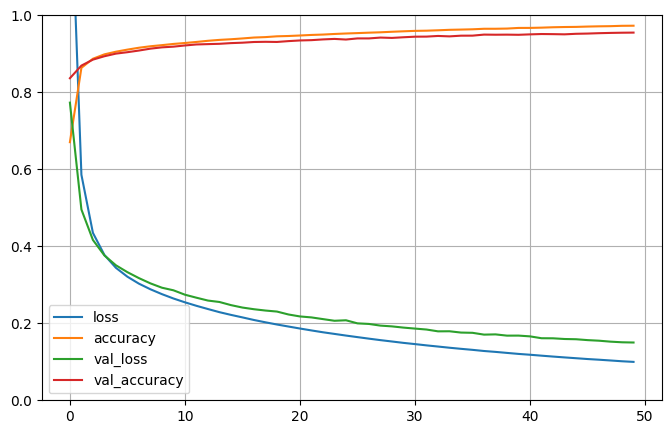

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Si el modelo no ha ido bien, prueba a cambiar el learning rate, cambia de optimizador y después prueba a cambiar capas, neuronas y funciones de activación.

Ya tenemos el modelo entrenado. Probémoslo con test

In [53]:
results = model.evaluate(X_test, y_test)
results

313/313 [==============================] - 1s 2ms/step - loss: 0.1239 - accuracy: 0.9625


[0.123934805393219, 0.9624999761581421]

C:\Users\Miguel Angel\AppData\Local\Temp\ipykernel_6324\1468152043.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));


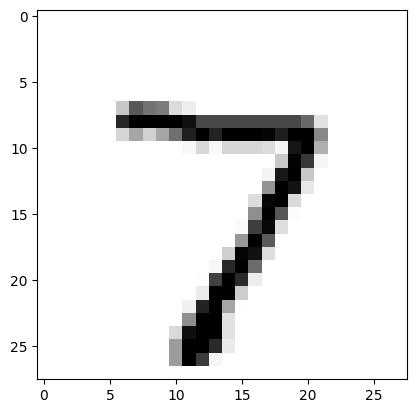

In [54]:
# Cogemos el primero
plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

In [55]:
X_test[:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [59]:
predictions = model.predict(X_test[:1])
print(predictions.shape)
np.round(predictions,3)

1/1 [==============================] - 0s 51ms/step
(1, 10)


array([[0.   , 0.   , 0.   , 0.006, 0.   , 0.   , 0.   , 0.993, 0.   ,
        0.   ]], dtype=float32)

In [60]:
predictions.argmax()

7

In [69]:
X_test.shape[0]

10000

In [68]:
X_test.shape[0]/32

312.5

In [61]:
model.predict(X_test).argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

C:\Users\Miguel Angel\AppData\Local\Temp\ipykernel_6324\4029188365.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.imshow(X_test[1].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));


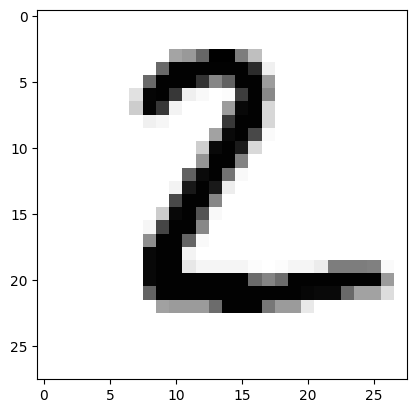

In [70]:
plt.imshow(X_test[1].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

In [71]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, model.predict(X_test).argmax(axis=1))

313/313 [==============================] - 1s 2ms/step


array([[ 963,    0,    2,    2,    1,    2,    7,    2,    1,    0],
       [   0, 1121,    3,    1,    1,    1,    4,    1,    3,    0],
       [   7,    1,  999,    2,    5,    0,    4,    6,    7,    1],
       [   0,    0,   12,  969,    0,    7,    0,   10,   10,    2],
       [   1,    0,    6,    1,  948,    0,    4,    2,    2,   18],
       [   9,    1,    0,   18,    3,  833,   11,    1,   10,    6],
       [   8,    3,    0,    1,    4,    6,  929,    1,    6,    0],
       [   1,    8,   16,    5,    2,    1,    0,  981,    0,   14],
       [   4,    0,    4,    9,    5,    6,    9,    7,  927,    3],
       [   6,    6,    2,    8,   16,    5,    1,    8,    2,  955]],
      dtype=int64)

In [72]:
print(classification_report(y_test, model.predict(X_test).argmax(axis=1)))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       980
         1.0       0.98      0.99      0.99      1135
         2.0       0.96      0.97      0.96      1032
         3.0       0.95      0.96      0.96      1010
         4.0       0.96      0.97      0.96       982
         5.0       0.97      0.93      0.95       892
         6.0       0.96      0.97      0.96       958
         7.0       0.96      0.95      0.96      1028
         8.0       0.96      0.95      0.95       974
         9.0       0.96      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



### Problema de regresión
Veamos un ejemplo de cómo aplicar una red neuronal de TensorFlow a un problema de regresión.

In [81]:
# Cargamos datos
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['target'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Divimos en train, test y validation

In [82]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [83]:
X_train.shape

(11610, 8)

Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de 8 neuronas (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.

In [77]:
11610/32

362.8125

In [79]:
X_train.shape[1:]

(8,)

In [84]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu',
                      input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss = "mean_squared_error",
             optimizer = "sgd")

history = model.fit(X_train,
                   y_train,
                   epochs = 20,
                   validation_data = (X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.8406 - val_loss: 1.2811
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 1.0670 - val_loss: 0.6855
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4990 - val_loss: 0.4656
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4458 - val_loss: 0.4254
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4261 - val_loss: 0.4081
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4143 - val_loss: 0.3986
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4045 - val_loss: 0.3895
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3974 - val_loss: 0.3820
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3899 - val_loss: 0.3873
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3856 - val_loss: 0.3716

In [59]:
8*30 + 30

270

In [60]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 30)                270       
                                                                 
 dense_10 (Dense)            (None, 1)                 31        
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [85]:
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3778
0.3777638077735901


In [86]:
y_pred = model.predict(X_test[:5])
y_pred

1/1 [==============================] - 0s 140ms/step


array([[0.9235085],
       [0.473468 ],
       [2.5334735],
       [3.074718 ],
       [1.7595313]], dtype=float32)

### Guardar modelo
Para guardar el modelo, en el formato de Keras (HDF5). 

In [87]:
model.save("my_keras_model.h5")

c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [88]:
# Lo volvemos a cargar
model = keras.models.load_model("my_keras_model.h5")

### Callbacks
Son funciones predefinidas de Keras a aplicar durante el entrenamiento
Por ejemplo, `ModelCheckpoint` sirve para que el modelo se vaya guardando tras cada epoch. Así no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

In [89]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.h5")
history = model.fit(X_train,
                   y_train,
                   epochs=30,
                   callbacks = [checkpoint_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3535
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3567
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3495
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3473
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3452
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3432
Epoch 7/30
152/363 [===========>..................] - ETA: 0s - loss: 0.3303

KeyboardInterrupt: 

### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un numero de epochs llamado `patience`. Se puede combinar con el callback

In [90]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3)
history = model.fit(X_train,
                   y_train,
                   epochs=50,
                   validation_data = (X_valid, y_valid),
                   callbacks = [early_stopping_cb, checkpoint_cb])

Epoch 1/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3411 - val_loss: 0.3405
Epoch 2/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3403 - val_loss: 0.3489
Epoch 3/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3374 - val_loss: 0.3395
Epoch 4/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3367 - val_loss: 0.3356
Epoch 5/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3360 - val_loss: 0.3323
Epoch 6/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3325 - val_loss: 0.3378
Epoch 7/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3336 - val_loss: 0.3382
Epoch 8/50
363/363 [==============================] - 2s 4ms/step - loss: 0.3383 - val_loss: 0.8515
